<Figure size 432x288 with 0 Axes>

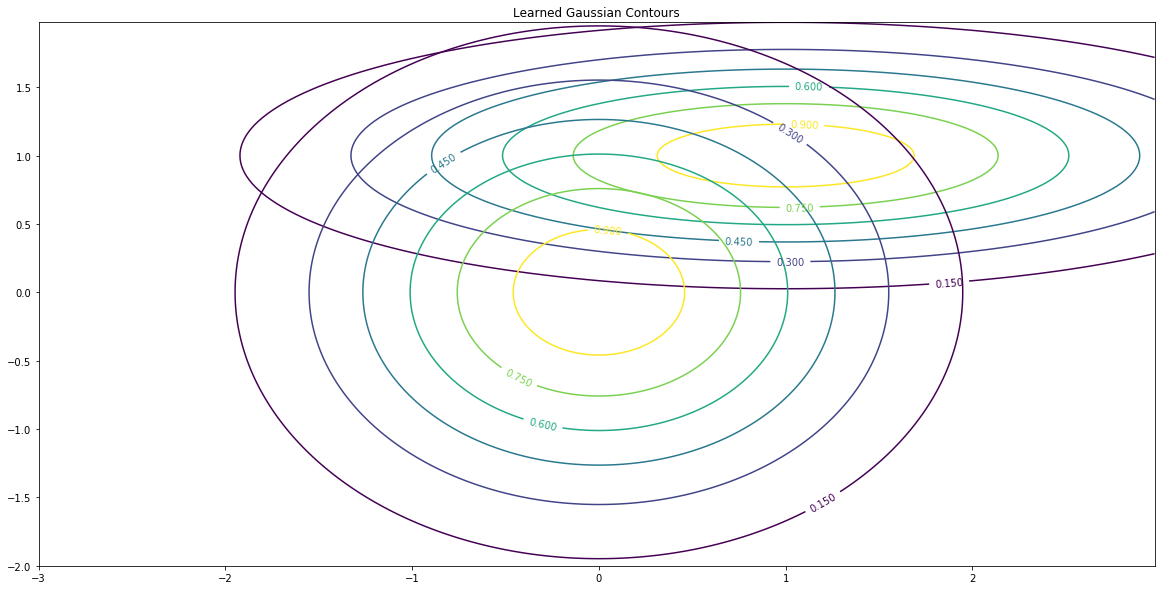

In [108]:
# -*- coding: utf-8 -*-
# -*- coding: utf-8 -*-
"""
Created on Sun Oct  7 18:10:29 2018


In Class Exercise:  xx/100  (+ 10 extra credit if submitted before end of day of class)
******************************************************
Assume: Single Gaussian
Goal: Implement functions, given data X.
mu0, sigma0 = gaussianML(X)
mu1, sigmaGuess = gaussianMAP(X, priorMu, sigmaGuess)
******************************************************

The functions should compute the ML and MAP estimates respectively. Plot
the results of the learned parameters (using a contour like display) for the 
purposes of comparison. Feel free  to use the code snippets provided below
or feel free to edit as you see fit. Assume covariance matrices are diagonal. 
Also assume \mu has Gaussian Prior. We will not solve for the MAP covariance,
instead, We will discuss more when we dive into Bayesian 
Methods. 

Construct synthetic 2-d data X or find a simple data set to use to test your code.

********************************************************


Take-Home Assignment:  xx/100
******************************************************
To Do: Type-up responses and supporting figures and submit as a PDF. 
******************************************************

#1 Assume a Single Gaussian Classifier with training data X. Assume a fixed
mean parameter \mu. What is the Maximum Likelihood Objective one would use to
solve for the variance parameter \sigma?

#2 Find (solve for) the ML estimate for the variance. Show all steps
 starting with the objective in #1. Show / explain all steps :)
 
#3 Show the MAP objective and assuming a fixed mean \mu. Show all steps 
starting with the MAP objective. Show / explain all steps :)
 
#4 Briefly compare and contrast the ML and MAP estimates for a single Gaussian Classifier.

#5 Prove that the ML and MAP mean estimates are similar when the prior probability is uniform.
Prove this semi-formally -- use math to help support your claims. ALSO Create plots from
your in-class exercise to support your claim.

********************************************************

For supplemental help ...
See Resources: 
    https://matplotlib.org/
    [TK], [Bp], [DHS]


@author: jerem
"""





import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Training Data
# Choose a training data set.
# X = 
 

# Create Method to Learn ML estimate of 2d Gaussia
#def gaussianML(X):
#    
# ... Fill this in 
#    return  mu, sigma
    
#def  gaussianMAP(X, priorMu, sigmaGuess):
#
# ... Fill this in
#    return  mu, sigma



def gaussian_2d(x, y, x0, y0, xsig, ysig):
    return np.exp(-0.5*(((x-x0) / xsig)**2 + ((y-y0) / ysig)**2))


def plt_2dGaussians(mu0, mu1, sig0, sig1):
    delta = 0.025
    x = np.arange(-3.0, 3.0, delta)
    y = np.arange(-2.0, 2.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = gaussian_2d(X, Y, mu0[0], mu0[1], sig0[0],sig0[1])
    Z2 = gaussian_2d(X, Y, mu1[0], mu1[1],  sig1[0],sig1[1])

    # Create a contour plot with labels using default colors.  The
    # inline argument to clabel will control whether the labels are draw
    # over the line segments of the contour, removing the lines beneath
    # the label
    
    # For use help, see https://matplotlib.org/
    plt.clf()
    plt.figure(figsize=(20,10))
    CS1 = plt.contour(X, Y, Z2)
    plt.clabel(CS1, inline=1, fontsize=10)
    CS2 = plt.contour(X, Y, Z1)
    plt.clabel(CS2, inline=1, fontsize=10)
    
    plt.title('Learned Gaussian Contours')


# Main
# Define values so simple example runs
mu0 = [0, 0]
mu1 = [1, 1]
sig0 = [1, 1]
sig1 = [1.5, 0.5]



plt_2dGaussians(mu0, mu1, sig0, sig1)

# In Class:

<Figure size 432x288 with 0 Axes>

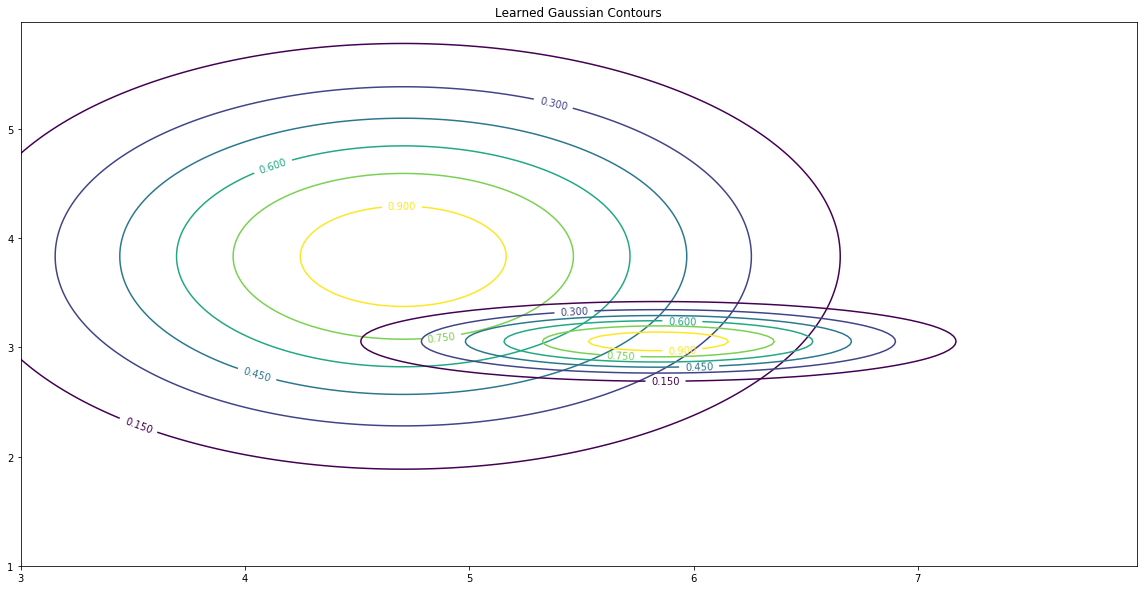

In [131]:
from sklearn import svm, datasets
import numpy as np


def gaussianML(X):
    mu0 = X.mean(axis = 0)
    sigma_matrix = 0
    for i in range(len(X)):
        gap = np.array([X[i] - mu0])
        sigma_matrix = sigma_matrix + np.matmul(gap.T, gap)
    sigma0 = (sigma_matrix/len(X)).diagonal().tolist()
    return mu0, sigma0
    
    
def gaussianMAP(X, priorMu, sigmaGuess):
    sigma0_0 = 0.1
    sigma0_1 = 0.1
    mu_0 = (priorMu[0] + ((sigma0_0**2.0)/(sigmaGuess[0]**2.0)) * sum(X[:, 0]))/(1 + ((sigma0_0**2.0)/(sigmaGuess[0]**2.0) * len(X[:, 0])))
    mu_1 = (priorMu[1] + ((sigma0_1**2.0)/(sigmaGuess[1]**2.0)) * sum(X[:, 1]))/(1 + ((sigma0_1**2.0)/(sigmaGuess[1]**2.0) * len(X[:, 1])))
    mu = [mu_0, mu_1]
    return mu, sigmaGuess

def gaussian_2d(x, y, x0, y0, xsig, ysig):
    return np.exp(-0.5*(((x-x0) / xsig)**2 + ((y-y0) / ysig)**2))


def plt_2dGaussians(mu0, mu1, sig0, sig1):
    delta = 0.025
    x = np.arange(3.0, 8.0, delta)
    y = np.arange(1.0, 6.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = gaussian_2d(X, Y, mu0[0], mu0[1], sig0[0],sig0[1])
    Z2 = gaussian_2d(X, Y, mu1[0], mu1[1],  sig1[0],sig1[1])

    # Create a contour plot with labels using default colors.  The
    # inline argument to clabel will control whether the labels are draw
    # over the line segments of the contour, removing the lines beneath
    # the label
    
    # For use help, see https://matplotlib.org/
    plt.clf()
    plt.figure(figsize=(20,10))
    CS1 = plt.contour(X, Y, Z2)
    plt.clabel(CS1, inline=1, fontsize=10)
    CS2 = plt.contour(X, Y, Z1)
    plt.clabel(CS2, inline=1, fontsize=10)
    
    plt.title('Learned Gaussian Contours')


iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

mu0, sigma0 = gaussianML(X)

sigmaGuess = [1, 1]
priorMu = [3, 5] 
mu1, sigmaGuess = gaussianMAP(X, priorMu, sigmaGuess)

plt_2dGaussians(mu0,mu1, sigma0, sigmaGuess)

# Take Home:

<figure>
    <img src="IMG_0270.PNG">
</figure>

In [147]:
from IPython.display import display, Image
display(Image(filename='IMG_0270.PNG'))

FileNotFoundError: [Errno 2] No such file or directory: 'IMG_0270.PNG'

<Figure size 432x288 with 0 Axes>

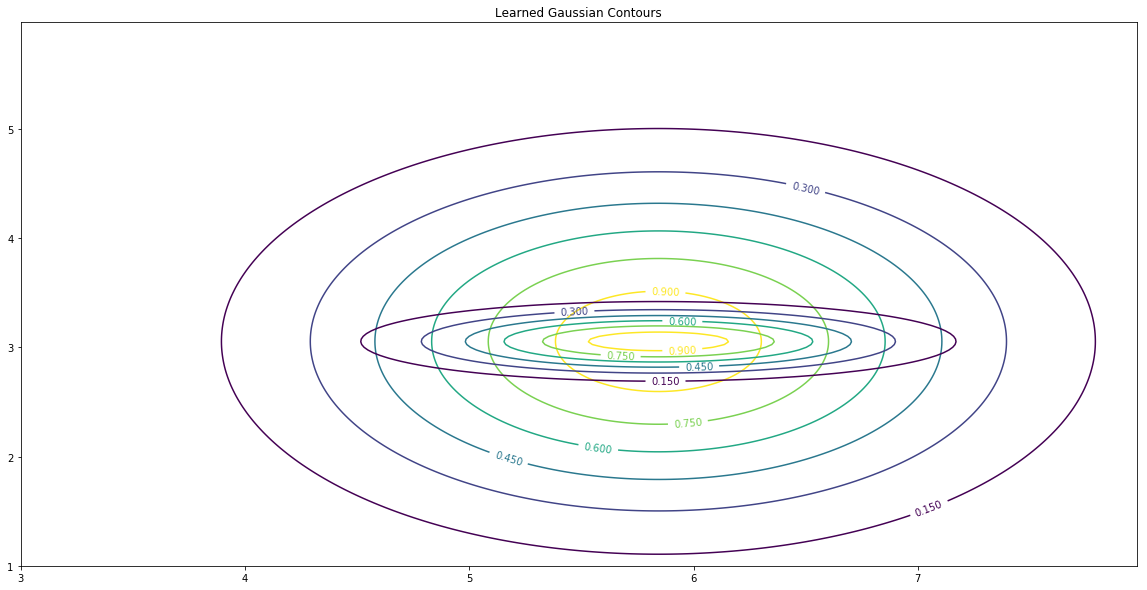

In [133]:
#Take-home: Prove that the ML and MAP mean estimates are similar when the prior probability is uniform.
#Prove this semi-formally -- use math to help support your claims. ALSO Create plots from
#your in-class exercise to support your claim.

mu0_take_home, sigma0_take_home = gaussianML(X)

def gaussianMAP_takehome(X, priorMu, sigmaGuess):
    sigma0_0 = 10000000
    sigma0_1 = 10000000
    mu_0 = (priorMu[0] + (sigma0_0**2.0)/(sigmaGuess[0]**2.0) * sum(X[:, 0]))/(1 + ((sigma0_0**2.0)/(sigmaGuess[0]**2.0) * len(X[:, 0])))
    mu_1 = (priorMu[1] + (sigma0_1**2.0)/(sigmaGuess[1]**2.0) * sum(X[:, 1]))/(1 + ((sigma0_1**2.0)/(sigmaGuess[1]**2.0) * len(X[:, 1])))
    mu = [mu_0, mu_1]
    return mu, sigmaGuess


priorMu  = [3, 5] 
sigmaGuess = [1, 1]
mu1_take_home, sigmaGuess_take_home = gaussianMAP_takehome(X, priorMu, sigmaGuess_take_home)

plt_2dGaussians(mu0_take_home, mu1_take_home, sigma0_take_home, sigmaGuess_take_home)

We can see that if we make the prior very very big, the two trojectory has the same center, which means that $\mu _{MAP} = \mu _{ML}$.